### Auther: Meetkumar Savaliya

#### Checking output values as it given in the assignment

In [6]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [7]:
np.random.seed(111)
nnet = NeuralNetworkClassifier(2, [10], 2)

In [8]:
nnet.Ws

[array([[ 0.12952296, -0.38212533, -0.07383268,  0.31091752, -0.23633798,
         -0.40511172, -0.55139454, -0.09211682, -0.30174387, -0.18745848],
        [ 0.56662595, -0.3028474 , -0.48359706,  0.19583749,  0.13999926,
         -0.26066957, -0.03900416, -0.44067096, -0.49195143,  0.46277416],
        [ 0.33943873,  0.39325596,  0.36397022,  0.56690583,  0.08922813,
          0.36230683, -0.09085429, -0.5456561 , -0.05295844, -0.45573018]]),
 array([[ 0.19129089,  0.11923431],
        [ 0.03936858, -0.13614606],
        [ 0.30059098, -0.21826885],
        [ 0.06959828, -0.00902345],
        [-0.05727085,  0.13739817],
        [-0.10684722, -0.05997329],
        [-0.10916737,  0.26968491],
        [ 0.25249064,  0.18925528],
        [-0.28096209,  0.2673639 ],
        [ 0.27162504,  0.18488136],
        [-0.01128977,  0.2814664 ]])]

If you add some print statements in `neg_log_likelihood` functions, you can compare your output to the following results.

In [9]:
nnet.train(X, T, 1, 0.1, method='sgd')

sgd: Epoch 1 Error=0.69995


NeuralNetwork(2, [10], 2)

In [10]:
np.exp(-0.35674)

0.6999544622383824

Now if you comment out those print statements, you can run for more epochs without tons of output.

In [11]:
np.random.seed(111)
nnet = NeuralNetworkClassifier(2, [10], 2)

In [12]:
nnet.train(X, T, 100, method='scg')

SCG: Epoch 10 Error=0.99066
SCG: Epoch 20 Error=0.99994
SCG: Epoch 30 Error=1.00000


NeuralNetwork(2, [10], 2)

In [13]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]], dtype=int32),
 array([[9.99999987e-01, 1.28247125e-08],
        [1.00985494e-08, 9.99999990e-01],
        [8.80028551e-09, 9.99999991e-01],
        [9.99999979e-01, 2.13210239e-08]]))

In [14]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [15]:
nnet = NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100)   # default method is 'scg'

NeuralNetwork(2, [], 2)

In [16]:
nnet.use(X)

(array([[1],
        [1],
        [1],
        [1]], dtype=int32),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [17]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [18]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [19]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,0.0,100.0
1,0.0,100.0


## Part 3: Apply `NeuralNetworkClassifier` to Images of Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](http://deeplearning.net/tutorial/gettingstarted.html).

In [20]:
import pickle
import gzip

In [21]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [22]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    # plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

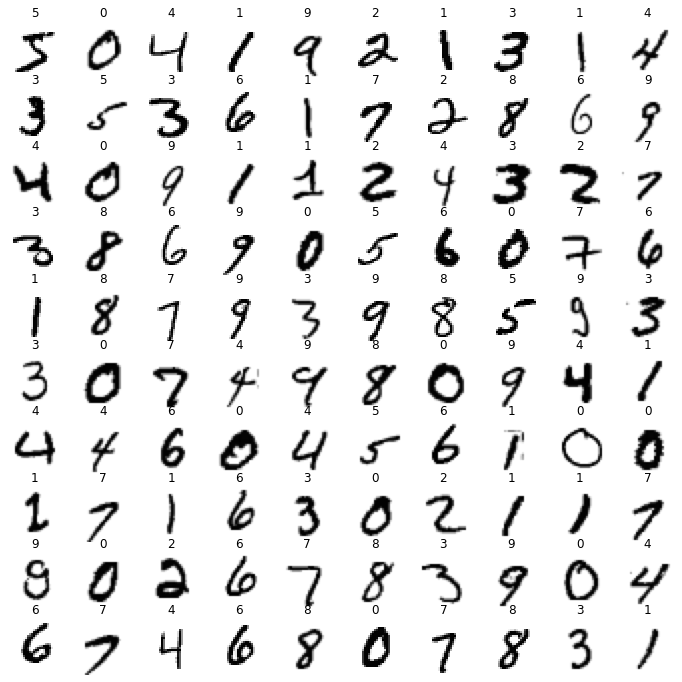

In [23]:
plt.figure(figsize=(12, 12))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])

In [12]:
nnet = NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, 40)

SCG: Epoch 4 Error=0.95246
SCG: Epoch 8 Error=0.96847
SCG: Epoch 12 Error=0.97247
SCG: Epoch 16 Error=0.97347
SCG: Epoch 20 Error=0.97347
SCG: Epoch 24 Error=0.97347
SCG: Epoch 28 Error=0.97347
SCG: Epoch 32 Error=0.97436
SCG: Epoch 36 Error=0.97542
SCG: Epoch 40 Error=0.97588


NeuralNetwork(784, [], 10)

In [13]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.33, 92.71000000000001, 92.27]

In [14]:
nnet = NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, 40)

SCG: Epoch 4 Error=0.94591
SCG: Epoch 8 Error=0.97089
SCG: Epoch 12 Error=0.97778
SCG: Epoch 16 Error=0.98174
SCG: Epoch 20 Error=0.98448
SCG: Epoch 24 Error=0.98674
SCG: Epoch 28 Error=0.98817
SCG: Epoch 32 Error=0.98938
SCG: Epoch 36 Error=0.99047
SCG: Epoch 40 Error=0.99131


NeuralNetwork(784, [20], 10)

In [15]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[97.762, 94.08999999999999, 93.87]

## Defination of  `train_for_best_validation` function 

Defination : train_for_best_validation():

Arguments:
* `Xtrain, Ttrain`: matrices of shapes $N\times D$ and $N\times 1$ as input and target training data, where $N$ is number of training samples and $D$ is number of input components,
* `Xval, Tval`: matrices of shapes  $N\times D$ and $N\times 1$ of validation data ($N$ not same value as above)
* `n_epochs`: total number of epochs to train for,
* `n_epochs_per_train`: divide `n_epochs` by this value to get number of times the neural network `train` function is called for this many epochs,
* `n_hiddens_list`: structure of hidden layers,
* `method`: optimizer method,
* `learning_rate`: used for optimizer methods 'adam' and 'sgd'.

Return values: 
* `nnet`: resulting neural network with weights that produced the highest accuracy for the validation data set,
* `epoch`: epoch corresponding to best validation accuracy,
* `train_accuracy`: accuracy at that best epoch on training data,
* `val_accuracy`: accuracy at that best epoch on validation data.

This function should call your `percent_correct` function to calculate classification accuracies.

 Epoch: 10 Train Accuracy 92.77 and Validation Accuracy 92.88
 Epoch: 20 Train Accuracy 95.19 and Validation Accuracy 93.73
 Epoch: 30 Train Accuracy 96.15 and Validation Accuracy 94.02
 Epoch: 40 Train Accuracy 96.90 and Validation Accuracy 94.13
 Epoch: 50 Train Accuracy 97.21 and Validation Accuracy 94.00
 Epoch: 60 Train Accuracy 97.61 and Validation Accuracy 94.16
 Epoch: 70 Train Accuracy 97.82 and Validation Accuracy 93.96
 Epoch: 80 Train Accuracy 98.09 and Validation Accuracy 94.10
 Epoch: 90 Train Accuracy 98.30 and Validation Accuracy 93.86
 Epoch: 100 Train Accuracy 98.44 and Validation Accuracy 94.02
 Epoch: 110 Train Accuracy 98.59 and Validation Accuracy 93.86
 Epoch: 120 Train Accuracy 98.70 and Validation Accuracy 93.96
 Epoch: 130 Train Accuracy 98.82 and Validation Accuracy 93.85
 Epoch: 140 Train Accuracy 98.94 and Validation Accuracy 93.77
 Epoch: 150 Train Accuracy 99.01 and Validation Accuracy 93.66
 Epoch: 160 Train Accuracy 99.07 and Validation Accuracy 93.64
 

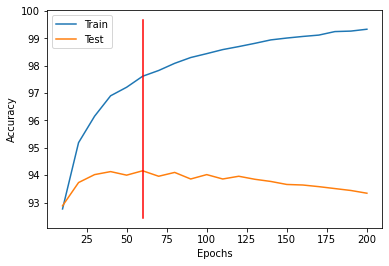

In [28]:
nnet, epoch, train_accuracy, val_accuracy = train_for_best_validation(Xtrain, Ttrain,  Xval, Tval, 
                                                                      200, 10, [20], method='scg') 

In [28]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[99.46000000000001, 93.8, 93.56]

## Experiment section for MNIST data set

Call `train_for_best_validation` a number of times to compare accuracies using the three different optimization methods, and a few different values of `n_epochs`, `n_epochs_per_train`, and `n_hiddens_list`, and `learning_rate` when using 'sgd' and 'adam'.  You do not have to find the very best values of these parameters.  For example, for `n_hiddens_list` at least use `[]` (a linear model) and a larger network, like `[100, 100]`.

Show the confusion matrix for the network that gave you the best validation accuracy.

#### optimizer: SGD

 Epoch: 10 Train Accuracy 14.82 and Validation Accuracy 15.24
 Epoch: 20 Train Accuracy 18.74 and Validation Accuracy 19.61
 Epoch: 30 Train Accuracy 24.13 and Validation Accuracy 24.62
 Epoch: 40 Train Accuracy 30.61 and Validation Accuracy 31.35
 Epoch: 50 Train Accuracy 36.85 and Validation Accuracy 38.21
 Epoch: 60 Train Accuracy 41.96 and Validation Accuracy 43.41
 Epoch: 70 Train Accuracy 46.34 and Validation Accuracy 47.90
 Epoch: 80 Train Accuracy 49.98 and Validation Accuracy 51.39
 Epoch: 90 Train Accuracy 53.27 and Validation Accuracy 54.87
 Epoch: 100 Train Accuracy 56.10 and Validation Accuracy 57.72
 Epoch: 110 Train Accuracy 58.43 and Validation Accuracy 60.40
 Epoch: 120 Train Accuracy 60.59 and Validation Accuracy 62.57
 Epoch: 130 Train Accuracy 62.47 and Validation Accuracy 64.43
 Epoch: 140 Train Accuracy 64.05 and Validation Accuracy 66.09
 Epoch: 150 Train Accuracy 65.34 and Validation Accuracy 67.48
 Epoch: 160 Train Accuracy 66.49 and Validation Accuracy 68.54
 

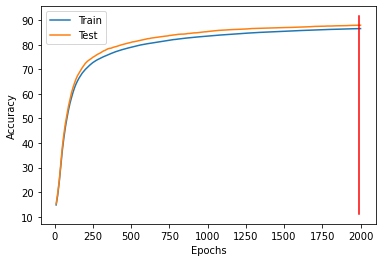

In [29]:
nnet, epoch, train_accuracy, val_accuracy = train_for_best_validation(Xtrain, Ttrain,  Xval, Tval, 
                                                                      2000, 10, [], method='sgd', learning_rate = 0.1) 

 Epoch: 10 Train Accuracy 11.28 and Validation Accuracy 10.61
 Epoch: 20 Train Accuracy 15.18 and Validation Accuracy 14.56
 Epoch: 30 Train Accuracy 20.15 and Validation Accuracy 19.77
 Epoch: 40 Train Accuracy 25.81 and Validation Accuracy 25.78
 Epoch: 50 Train Accuracy 31.46 and Validation Accuracy 31.97
 Epoch: 60 Train Accuracy 36.68 and Validation Accuracy 37.01
 Epoch: 70 Train Accuracy 41.13 and Validation Accuracy 41.54
 Epoch: 80 Train Accuracy 44.79 and Validation Accuracy 45.49
 Epoch: 90 Train Accuracy 48.14 and Validation Accuracy 49.33
 Epoch: 100 Train Accuracy 51.07 and Validation Accuracy 52.01
 Epoch: 110 Train Accuracy 53.46 and Validation Accuracy 54.89
 Epoch: 120 Train Accuracy 55.60 and Validation Accuracy 56.95
 Epoch: 130 Train Accuracy 57.45 and Validation Accuracy 59.07
 Epoch: 140 Train Accuracy 59.19 and Validation Accuracy 60.62
 Epoch: 150 Train Accuracy 60.79 and Validation Accuracy 62.19
 Epoch: 160 Train Accuracy 62.18 and Validation Accuracy 63.40
 

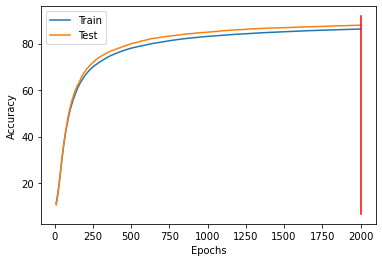

In [30]:
nnet, epoch, train_accuracy, val_accuracy = train_for_best_validation(Xtrain, Ttrain,  Xval, Tval, 
                                                                      2000, 10, [], method='sgd', learning_rate = 0.01) 

 Epoch: 10 Train Accuracy 16.09 and Validation Accuracy 16.90
 Epoch: 20 Train Accuracy 16.86 and Validation Accuracy 17.71
 Epoch: 30 Train Accuracy 17.63 and Validation Accuracy 18.56
 Epoch: 40 Train Accuracy 18.35 and Validation Accuracy 19.18
 Epoch: 50 Train Accuracy 18.99 and Validation Accuracy 19.82
 Epoch: 60 Train Accuracy 19.55 and Validation Accuracy 20.35
 Epoch: 70 Train Accuracy 20.17 and Validation Accuracy 20.93
 Epoch: 80 Train Accuracy 20.70 and Validation Accuracy 21.50
 Epoch: 90 Train Accuracy 21.25 and Validation Accuracy 21.98
 Epoch: 100 Train Accuracy 21.74 and Validation Accuracy 22.54
 Epoch: 110 Train Accuracy 22.24 and Validation Accuracy 23.02
 Epoch: 120 Train Accuracy 22.75 and Validation Accuracy 23.47
 Epoch: 130 Train Accuracy 23.22 and Validation Accuracy 23.94
 Epoch: 140 Train Accuracy 23.64 and Validation Accuracy 24.23
 Epoch: 150 Train Accuracy 24.13 and Validation Accuracy 24.80
 Epoch: 160 Train Accuracy 24.56 and Validation Accuracy 25.33
 

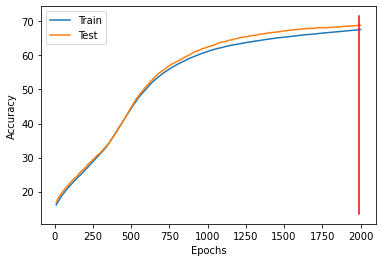

In [31]:
nnet, epoch, train_accuracy, val_accuracy = train_for_best_validation(Xtrain, Ttrain,  Xval, Tval, 
                                                                      2000, 10, [10,20], method='sgd', learning_rate = 0.1) 

 Epoch: 10 Train Accuracy 10.05 and Validation Accuracy 10.06
 Epoch: 20 Train Accuracy 10.06 and Validation Accuracy 10.06
 Epoch: 30 Train Accuracy 10.07 and Validation Accuracy 10.06
 Epoch: 40 Train Accuracy 10.07 and Validation Accuracy 10.08
 Epoch: 50 Train Accuracy 10.08 and Validation Accuracy 10.09
 Epoch: 60 Train Accuracy 10.09 and Validation Accuracy 10.10
 Epoch: 70 Train Accuracy 10.10 and Validation Accuracy 10.11
 Epoch: 80 Train Accuracy 10.11 and Validation Accuracy 10.12
 Epoch: 90 Train Accuracy 10.13 and Validation Accuracy 10.12
 Epoch: 100 Train Accuracy 10.14 and Validation Accuracy 10.13
 Epoch: 110 Train Accuracy 10.15 and Validation Accuracy 10.15
 Epoch: 120 Train Accuracy 10.16 and Validation Accuracy 10.16
 Epoch: 130 Train Accuracy 10.16 and Validation Accuracy 10.18
 Epoch: 140 Train Accuracy 10.17 and Validation Accuracy 10.19
 Epoch: 150 Train Accuracy 10.19 and Validation Accuracy 10.21
 Epoch: 160 Train Accuracy 10.20 and Validation Accuracy 10.23
 

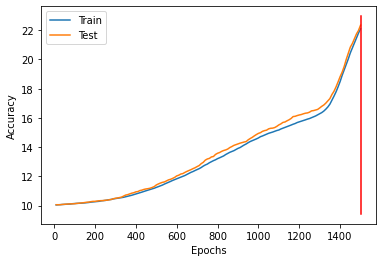

In [19]:
nnet, epoch, train_accuracy, val_accuracy = train_for_best_validation(Xtrain, Ttrain,  Xval, Tval, 
                                                                      1500, 10, [10,20,30,40,50], method='sgd', learning_rate = 0.1) 

 Epoch: 10 Train Accuracy 11.84 and Validation Accuracy 12.38
 Epoch: 20 Train Accuracy 13.04 and Validation Accuracy 13.61
 Epoch: 30 Train Accuracy 14.38 and Validation Accuracy 15.08
 Epoch: 40 Train Accuracy 15.82 and Validation Accuracy 16.32
 Epoch: 50 Train Accuracy 17.35 and Validation Accuracy 17.84
 Epoch: 60 Train Accuracy 18.99 and Validation Accuracy 19.17
 Epoch: 70 Train Accuracy 20.73 and Validation Accuracy 20.83
 Epoch: 80 Train Accuracy 22.44 and Validation Accuracy 22.48
 Epoch: 90 Train Accuracy 24.21 and Validation Accuracy 24.07
 Epoch: 100 Train Accuracy 26.14 and Validation Accuracy 26.16
 Epoch: 110 Train Accuracy 28.13 and Validation Accuracy 28.14
 Epoch: 120 Train Accuracy 30.12 and Validation Accuracy 30.31
 Epoch: 130 Train Accuracy 32.21 and Validation Accuracy 32.41
 Epoch: 140 Train Accuracy 34.32 and Validation Accuracy 34.40
 Epoch: 150 Train Accuracy 36.13 and Validation Accuracy 36.51
 Epoch: 160 Train Accuracy 37.84 and Validation Accuracy 38.31
 

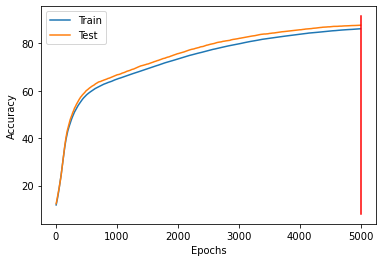

In [20]:
nnet, epoch, train_accuracy, val_accuracy = train_for_best_validation(Xtrain, Ttrain,  Xval, Tval, 
                                                                      5000, 10, [100,100], method='sgd', learning_rate = 0.1) 

#### Confusion matrix for `sgd` optimizers

the best `epoch`:<strong>5000</strong>, `Train Accuracy`: <strong>86.10</strong> and `Validation Accuracy`: <strong>87.59</strong>   ----> <strong>Could have achieved more for more number of epochs</strong>

the Experimental Parameters are `n_hiddens_list`: [100,100], `n_epochs`: 5000 and `learning_rate`:0.1

In [26]:
confusion_matrix(nnet.use(Xtest)[0],Ttest)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.9,0.0,0.2,0.1,0.0,0.6,1.7,0.2,0.2,0.0
1,0.0,97.7,0.2,0.4,0.0,0.1,0.4,0.0,1.3,0.0
2,1.6,2.3,82.8,2.3,1.9,0.0,3.2,2.0,3.6,0.2
3,0.6,1.0,2.6,88.7,0.1,1.5,0.2,2.6,2.4,0.4
4,0.1,1.0,0.2,0.0,89.2,0.0,1.8,0.3,0.2,7.1
5,3.8,1.5,0.9,9.5,2.5,74.7,2.8,1.8,1.3,1.2
6,1.9,0.6,1.0,0.0,0.8,1.4,94.2,0.0,0.1,0.0
7,0.3,4.6,1.5,0.5,0.6,0.0,0.0,88.4,0.3,3.9
8,1.8,4.3,2.3,4.9,2.2,4.7,1.3,2.2,73.6,2.7
9,1.2,1.3,0.3,1.3,8.1,0.5,0.3,5.6,0.4,81.1


In [27]:
confusion_matrix(nnet.use(Xval)[0],Tval)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,95.8,0.0,0.3,0.4,0.3,0.3,1.8,0.2,0.9,0.0
1,0.0,97.7,0.5,0.2,0.1,0.3,0.5,0.1,0.7,0.0
2,0.7,2.0,86.2,1.8,1.5,0.1,3.5,1.6,2.1,0.4
3,0.9,1.7,3.8,86.0,0.3,1.8,0.6,0.9,3.0,1.1
4,0.0,1.0,0.3,0.0,89.9,0.0,1.1,0.2,0.2,7.2
5,3.7,1.9,2.1,9.5,1.4,73.4,3.7,0.9,1.4,2.0
6,0.6,1.0,1.1,0.0,0.4,0.4,96.2,0.0,0.2,0.0
7,0.7,3.5,0.4,0.6,0.7,0.0,0.0,92.1,0.0,1.9
8,1.3,6.8,2.8,4.7,0.6,2.7,0.9,1.4,75.3,3.6
9,1.0,1.7,0.4,1.6,6.6,0.2,0.0,6.9,0.4,81.3


# Grading

Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.